In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
train_data.head()
#test_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Check whether if there are missing data in dataset. 
train_data.isnull().sum()
test_data.isnull().sum()
#print(train_data.isnull().sum() > 0)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [4]:
#get X and Y

y = train_data["Survived"]
features = ["Pclass", "Sex","Age", "SibSp", "Parch", "Fare", "Embarked"]
X = train_data[features]
test_data =  test_data[features]
print(X.columns)
#print(X)

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')


In [5]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

#Data pipeline. To standardise, one hot encode using pd.dummies and 
def data_pipeline(X,y,test_data):
    X_train_full = X
    #Find out the catergorical and numerical column of the data
    categorical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype == "object"]
    numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]
    my_cols = categorical_cols + numerical_cols
    X_train = X_train_full[my_cols].copy()
    test_data = test_data[my_cols].copy()
    
    #use imputer to add the data into dataset
    categorical_imputer = SimpleImputer(strategy='most_frequent')
    X_train[categorical_cols] = categorical_imputer.fit_transform(X[categorical_cols])
    numerical_imputer = SimpleImputer(strategy='mean')
    X_train[numerical_cols] = numerical_imputer.fit_transform(X[numerical_cols])
    
    test_data[categorical_cols] = categorical_imputer.fit_transform(test_data[categorical_cols])
    test_data[numerical_cols] = numerical_imputer.fit_transform(test_data[numerical_cols])
    
    #one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
    #X_train = one_hot_encoder.fit_transform(X_train[['Pclass, ']])
    
    X_train = pd.get_dummies(X_train)
    test_data = pd.get_dummies(test_data)
    
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y, test_size=0.2, random_state=0)
    
    return X_train, X_valid, y_train, y_valid, test_data

X_train, X_valid, y_train, y_valid, test_data_pipeline= data_pipeline(X, y, test_data)
#print(X_train.isnull().sum())
print(test_data_pipeline)

     Pclass       Age  SibSp  Parch      Fare  Sex_female  Sex_male  \
0       3.0  34.50000    0.0    0.0    7.8292           0         1   
1       3.0  47.00000    1.0    0.0    7.0000           1         0   
2       2.0  62.00000    0.0    0.0    9.6875           0         1   
3       3.0  27.00000    0.0    0.0    8.6625           0         1   
4       3.0  22.00000    1.0    1.0   12.2875           1         0   
..      ...       ...    ...    ...       ...         ...       ...   
413     3.0  30.27259    0.0    0.0    8.0500           0         1   
414     1.0  39.00000    0.0    0.0  108.9000           1         0   
415     3.0  38.50000    0.0    0.0    7.2500           0         1   
416     3.0  30.27259    0.0    0.0    8.0500           0         1   
417     3.0  30.27259    1.0    1.0   22.3583           0         1   

     Embarked_C  Embarked_Q  Embarked_S  
0             0           1           0  
1             0           0           1  
2             0      

mae score =  0.2011173184357542
accuracy =  0.7988826815642458


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


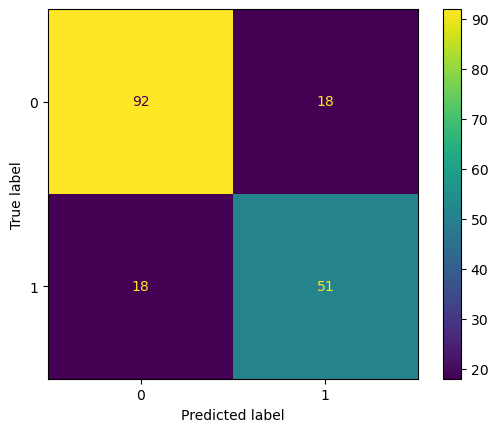

In [6]:
#Model 1: logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


model_1 =  LogisticRegression()
model_1.fit(X_train, y_train)

predictions_1 = model_1.predict(X_valid)

#MAE best value is 0.0. the lower the better
mae = mean_absolute_error(y_valid, predictions_1)
print("mae score = ", mae)
accuracy = accuracy_score(y_valid,predictions_1)
print("accuracy = ", accuracy)
cm = confusion_matrix(y_valid, predictions_1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = model_1.classes_)
disp.plot()

#model_1.predict(test_data)
#print(model_1.predict(test_data))

mae score =  0.22905027932960895
accuracy =  0.770949720670391


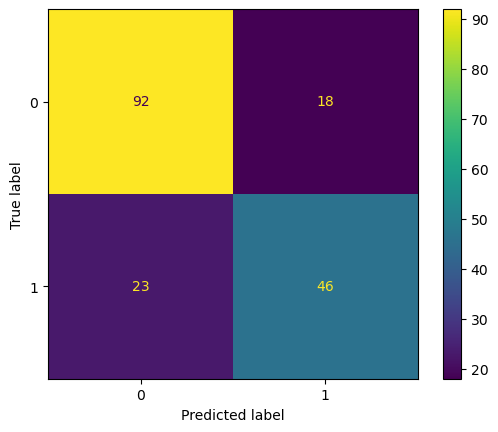

In [7]:
#Model 2: decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

model_2 = DecisionTreeClassifier()
clf = model_2.fit(X_train, y_train)

predictions_2 = model_2.predict(X_valid)

mae = mean_absolute_error(y_valid, predictions_2)
print("mae score = ", mae)
accuracy = accuracy_score(y_valid,predictions_2)
print("accuracy = ", accuracy)
cm = confusion_matrix(y_valid, predictions_2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = model_2.classes_)
disp.plot()
#print(predictions_2)

#plot_tree(clf)

mae score =  0.2737430167597765
accuracy =  0.7262569832402235


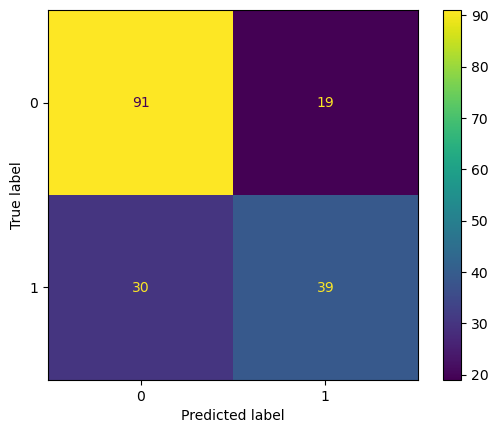

In [8]:
#Model 3:  KNN
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

model_3 = KNeighborsClassifier(n_neighbors=5)
model_3.fit(X_train, y_train)

predictions_3 = model_3.predict(X_valid)

mae = mean_absolute_error(y_valid, predictions_3)
print("mae score = ", mae)
accuracy = accuracy_score(y_valid,predictions_3)
print("accuracy = ", accuracy)
cm = confusion_matrix(y_valid, predictions_3)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = model_3.classes_)
disp.plot()

#print(predictions_3)

mae score =  0.1452513966480447
accuracy =  0.8547486033519553


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


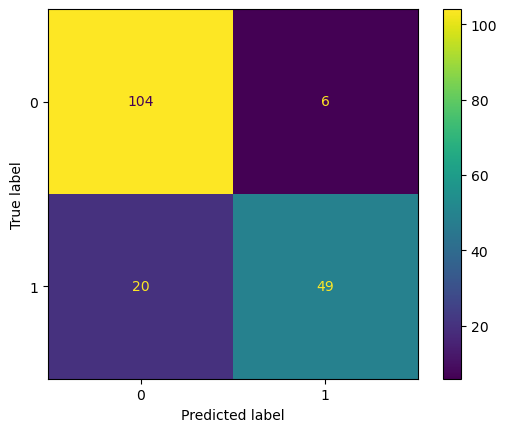

In [9]:
#model 4: xgboost 
from xgboost import XGBRegressor
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

model_4 = XGBRegressor(n_estimators=500, learning_rate=0.05)
model_4.fit(X_train, y_train,
           early_stopping_rounds=5, 
            eval_set=[(X_valid, y_valid)], 
             verbose=False)

predictions_4 = model_4.predict(X_valid)

#print(predictions_4)
for i in range(len(predictions_4)):
    if predictions_4[i] < 0.5:
        predictions_4[i] = 0
    else:
         predictions_4[i]=1
        
mae = mean_absolute_error(y_valid, predictions_4)
print("mae score = ", mae)
accuracy = accuracy_score(y_valid,predictions_4)
print("accuracy = ", accuracy)
cm = confusion_matrix(y_valid, predictions_4)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = model_3.classes_)
disp.plot()

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

Epoch 1/50
18/18 [==============================] - 2s 19ms/step - loss: 0.9167 - accuracy: 0.6678 - val_loss: 0.7502 - val_accuracy: 0.5944
Epoch 2/50
18/18 [==============================] - 0s 4ms/step - loss: 0.6173 - accuracy: 0.6942 - val_loss: 0.6177 - val_accuracy: 0.6503
Epoch 3/50
18/18 [==============================] - 0s 4ms/step - loss: 0.5842 - accuracy: 0.7083 - val_loss: 0.6150 - val_accuracy: 0.6434
Epoch 4/50
18/18 [==============================] - 0s 4ms/step - loss: 0.6012 - accuracy: 0.6766 - val_loss: 0.5952 - val_accuracy: 0.6643
Epoch 5/50
18/18 [==============================] - 0s 4ms/step - loss: 0.6322 - accuracy: 0.6837 - val_loss: 0.7330 - val_accuracy: 0.5594
Epoch 6/50
18/18 [==============================] - 0s 5ms/step - loss: 0.5848 - accuracy: 0.7083 - val_loss: 0.6667 - val_accuracy: 0.5524
Epoch 7/50
18/18 [==============================] - 0s 5ms/step - loss: 0.5773 - accuracy: 0.7030 - val_loss: 0.5672 - val_accuracy: 0.6643
Epoch 8/50
18/18 [=

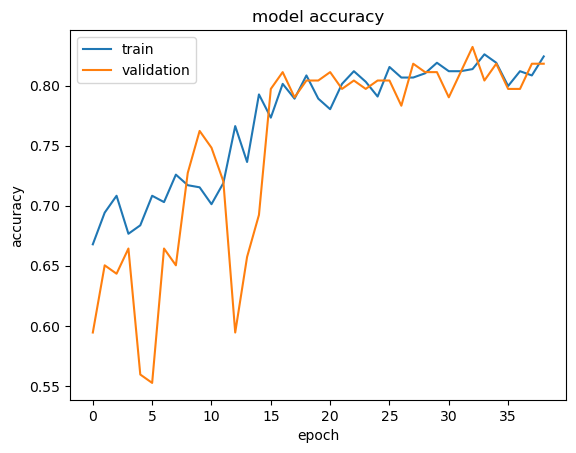

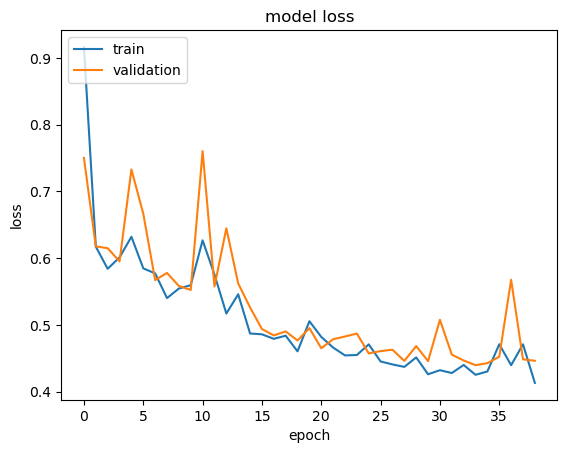

In [10]:
#model_5 neural network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

model_5 =  keras.Sequential([
    Dense(units = 50, input_shape = (10,), activation ='relu'),
    Dense(units = 50, activation ='relu'),
    Dense(units = 50, activation ='relu'),
    Dense(units = 1, activation ='sigmoid')
])

model_5.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
history = model_5.fit(X_train, y_train, epochs = 50, validation_split=0.2, callbacks=[callback])

predictions_5 = model_5.predict(X_valid)
for i in range(len(predictions_5)):
    if predictions_5[i] < 0.5:
        predictions_5[i] = 0
    else:
         predictions_5[i]=1
            
mae = mean_absolute_error(y_valid, predictions_5)
print("mae score = ", mae)
accuracy = accuracy_score(y_valid,predictions_5)
print("accuracy = ", accuracy)
cm = confusion_matrix(y_valid, predictions_5)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
#disp.plot()

#plot history curve
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()



In [11]:
final_prediction=model_5.predict(test_data_pipeline)
for i in range(len(final_prediction)):
    if final_prediction[i] < 0.5:
        final_prediction[i] = 0
    else:
        final_prediction[i]=1
#print(final_prediction)
final_prediction = final_prediction.reshape(418,)
#print(final_prediction)

test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': final_prediction})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

14/14 [==============================] - 0s 2ms/step
Your submission was successfully saved!


In [12]:
from sklearn.model_selection import cross_val_score

scores = -1 * cross_val_score(model_4, X_valid, y_valid,
                              cv=5,
                              scoring='neg_mean_absolute_error')
print(scores)

[0.23906487 0.2736735  0.30106031 0.19462368 0.22170021]
